Words in index: 22101


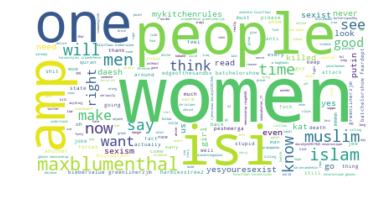

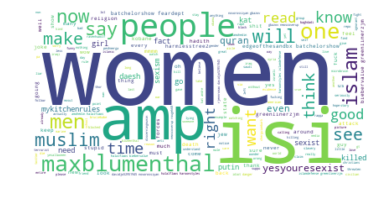

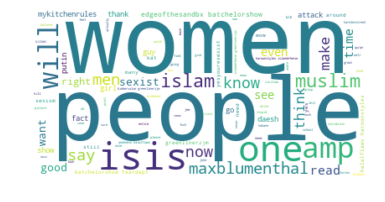

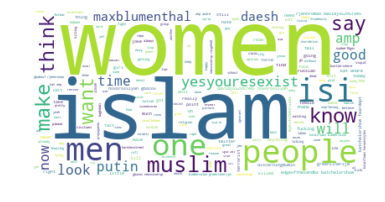

In [2]:
import numpy as np
import pandas as pd

from src.data.preprocess.dataturks.preprocess_translearn_hatespeech import create_NN_sets
from src.evaluation.hatespeech.evaluation_translearn_hatespeech import evaluate_best_model, get_predictions, \
    draw_wordcloud
from src.models.hatespeech.model_translearn_hatespeech import fine_tune_model, create_model

np.random.seed(42)
vocab_size = 10000
path_to_target_data = "../../data/external/hatespeech/clean_sexism_dataset.csv"
path_to_original_model = "../../models/example_dataturks.h5"
path_to_fine_tuned_model = "../../models/fine_tuned.h5"
path_to_fine_tuned_model_last = "../../models/fine_tuned_last_layer.h5"
path_to_sexist_model = "../../models/zeerak_model.h5"

datasets = create_NN_sets(path_to_target_data, vocab_size)
fine_tune_model(path_to_original_model, path_to_fine_tuned_model, datasets)
print("\n Evaluation of model with ALL layers fine-tuned:")
evaluate_best_model(path_to_fine_tuned_model, datasets[4], datasets[5], datasets[6], 10000)

# fine_tune_model(path_to_original_model, path_to_fine_tuned_model2, datasets)
print("\n Evaluation of model with LAST layer fine-tuned:")
evaluate_best_model(path_to_fine_tuned_model_last, datasets[4], datasets[5], datasets[6], 10000)

# train_model(path_to_sexist_model, datasets, vocab_size)
print("\n Evaluation of model trained from scratch:")
evaluate_best_model(path_to_sexist_model, datasets[4], datasets[5], datasets[6], 10000)


def returns_differences(path_to_model):
    """ Returns the dataframe with only the rows where the labeling is different
    Args:
        path_to_model (str) : the path the to model to be studied.
        
    Returns:
        df (pandas df) : the dataframe containing rows where the labeling was different.
    """
    data = pd.read_csv(path_to_target_data)
    best_model = create_model(datasets[6], vocab_size)
    best_model.load_weights(path_to_model)
    
    predictions = get_predictions(best_model, datasets[4])
    df_pred = pd.DataFrame({"predictions":predictions})
    df_test = data.loc[datasets[5].index, :].reset_index()
    df = pd.concat([df_test, df_pred], axis = 1)
    return df.loc[df.loc[:, "label"] != df.loc[:, "predictions"]]

# Error Analysis
df_original = returns_differences(path_to_original_model)
df_all = returns_differences(path_to_fine_tuned_model)
df_last = returns_differences(path_to_fine_tuned_model_last)
df_sexist = returns_differences(path_to_sexist_model)


draw_wordcloud(df_all['text'], "all_layers")
draw_wordcloud(df_last['text'], "last")
draw_wordcloud(df_sexist['text'], "sexist")
draw_wordcloud(df_original['text'], "original")